# Tutorial อ่านไฟล์ NII
วิธี install nibabel ที่เป็น library สำหรับอ่านไฟล์ .nii

In [2]:
#!pip install nibabel

เริ่มต้นโดยการอ่านไฟล์

In [3]:
import os
import numpy as np
from nibabel.testing import data_path

example_filename = 'Data/MICCAI_BraTS_2019_Data_Training/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii.gz'

import nibabel as nib
img = nib.load(example_filename)



แสดงผลหนึ่งสไลด์

(240, 240, 155)
(240, 240, 155)


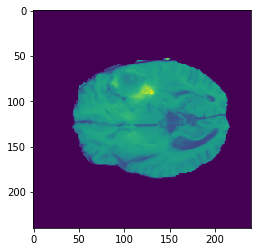

In [4]:
print(img.shape)

import matplotlib.pyplot as plt
%matplotlib inline
data = img.get_fdata()
print(data.shape)
plt.imshow(data[:,:,70])

In [5]:
import ipywidgets as widgets

In [6]:
x=widgets.IntSlider(
    value=7,
    min=0,
    max=data.shape[2],
    step=1,
    description='Slice:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)



In [7]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
def f(z):
    plt.imshow(data[:,:,z])

interact(f, z=x);

interactive(children=(IntSlider(value=7, description='Slice:', max=155), Output()), _dom_classes=('widget-inte…

In [9]:
#!pip install visvis

In [10]:
import visvis as vv 
from skimage.measure import marching_cubes_lewiner
import numpy as np

verts, faces, normals, values = marching_cubes_lewiner(np.transpose(data, (2, 0, 1)), 0.0) 
vv.mesh(np.fliplr(verts), faces, normals, values) 
vv.use().Run() 

In [11]:
thefile = open('test.obj', 'w')
for item in verts:
  thefile.write("v  {1} {2} {0}\n".format(item[1],item[2],item[0]))

for item in normals:
  thefile.write("vn  {1} {2} {0}\n".format(item[1],item[2],item[0]))

for item in faces:
  thefile.write("f  {1}//{1} {2}//{2} {0}//{0}\n".format(item[1],item[2],item[0]))  

thefile.close()

import certifi
import urllib3
http = urllib3.PoolManager(
     cert_reqs='CERT_REQUIRED',
     ca_certs=certifi.where())
http.request('GET', 'https://sketchfab.com')

In [12]:
from time import sleep
import requests

SKETCHFAB_DOMAIN = 'sketchfab.com'
SKETCHFAB_API_URL = 'https://api.{}/v2/models'.format(SKETCHFAB_DOMAIN)
SKETCHFAB_MODEL_URL = 'https://{}/models/'.format(SKETCHFAB_DOMAIN)

YOUR_API_TOKEN = "d209d8a24d1f422bac84d097f4bf0afd"


def upload(data, files):
    """
    Upload a model to sketchfab
    """
    print ('Uploading ...')

    try:
        r = requests.post(SKETCHFAB_API_URL, data=data, files=files, verify=False)
    except requests.exceptions.RequestException as e:
        print ("An error occured: {}".format(e))
        return

    result = r.json()

    if r.status_code != requests.codes.created:
        print ("Upload failed with error: {}".format(result))
        return

    model_uid = result['uid']
    model_url = SKETCHFAB_MODEL_URL + model_uid
    print ("Upload successful. Your model is being processed.")
    print ("Once the processing is done, the model will be available at: {}".format(model_url)
)
    return model_uid


def poll_processing_status(model_uid):
    """
    Poll the Sketchfab API to query the processing status
    """
    polling_url = "{}/{}/status?token={}".format(SKETCHFAB_API_URL, model_uid, YOUR_API_TOKEN)
    max_errors = 10
    errors = 0
    retry = 0
    max_retries = 50
    retry_timeout = 5  # seconds

    print ("Start polling processing status for model {}".format(model_uid))

    while (retry < max_retries) and (errors < max_errors):
        print ("Try polling processing status (attempt #{}) ...".format(retry))

        try:
            r = requests.get(polling_url)
        except requests.exceptions.RequestException as e:
            print ("Try failed with error {}".format(e))
            errors += 1
            retry += 1
            continue

        result = r.json()

        if r.status_code != requests.codes.ok:
            print ("Upload failed with error: {}".format(result['error']))
            errors += 1
            retry += 1
            continue

        processing_status = result['processing']
        if processing_status == 'PENDING':
            print ("Your model is in the processing queue. Will retry in {} seconds".format(retry_timeout))
            print ("Want to skip the line? Get a pro account! https://sketchfab.com/plans")
            retry += 1
            sleep(retry_timeout)
            continue
        elif processing_status == 'PROCESSING':
            print ("Your model is still being processed. Will retry in {} seconds".format(retry_timeout))
            retry += 1
            sleep(retry_timeout)
            continue
        elif processing_status == 'FAILED':
            print ("Processing failed: {}".format(result['error']))
            return
        elif processing_status == 'SUCCEEDED':
            model_url = SKETCHFAB_MODEL_URL + model_uid
            print ("Processing successful. Check your model here: {}".format(model_url))
            return

        retry += 1

    print ("Stopped polling after too many retries or too many errors")

model_file = "test.obj" # path to your model

# Optional parameters
name = "tast"
description = "-"
password = "my-password"  # requires a pro account
private = 1  # requires a pro account
tags = "-"  # space-separated list of tags

data = {
    'token': YOUR_API_TOKEN,
    'name': name,
    'description': description,
    'tags': tags,
    'private': private,
    'password': password
}

f = open(model_file, 'rb')

files  = {
    'modelFile': f
}

try:
    model_uid = upload(data, files)
    poll_processing_status(model_uid)
finally:
    f.close()

Uploading ...


c:\users\asus\miniconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Upload failed with error: {'detail': 'You have reached the private model limit of your plan'}
Start polling processing status for model None
Try polling processing status (attempt #0) ...


KeyError: 'error'

In [ ]:
#pip install pyqrcode

#import pyqrcode 
#from pyqrcode import QRCode 
  
  
# String which represent the QR code 
#s = "www.geeksforgeeks.org"
  
# Generate QR code 
#url = pyqrcode.create(s) 
  
# Create and save the png file naming "myqr.png" 
#url.png("myqr.svg", scale = 8) 

In [ ]:
from time import sleep
import pyqrcode
import requests

SKETCHFAB_DOMAIN = 'sketchfab.com'
SKETCHFAB_API_URL = 'https://api.{}/v2/models'.format(SKETCHFAB_DOMAIN)
SKETCHFAB_MODEL_URL = 'https://{}/models/'.format(SKETCHFAB_DOMAIN)

YOUR_API_TOKEN = "d209d8a24d1f422bac84d097f4bf0afd"


def upload(data, files):
    """
    Upload a model to sketchfab
    """
    print ('Uploading ...')

    try:
        r = requests.post(SKETCHFAB_API_URL, data=data, files=files, verify=False)
    except requests.exceptions.RequestException as e:
        print ("An error occured: {}".format(e))
        return

    result = r.json()

    if r.status_code != requests.codes.created:
        print ("Upload failed with error: {}".format(result))
        return

    model_uid = result['uid']
    model_url = SKETCHFAB_MODEL_URL + model_uid
    print ("Upload successful. Your model is being processed.")
    print ("Once the processing is done, the model will be available at: {}".format(model_url)
)
    return model_uid

def poll_processing_status(model_uid):
    """
    Poll the Sketchfab API to query the processing status
    """
    polling_url = "{}/{}/status?token={}".format(SKETCHFAB_API_URL, model_uid, YOUR_API_TOKEN)
    max_errors = 10
    errors = 0
    retry = 0
    max_retries = 50
    retry_timeout = 5  # seconds

    print ("Start polling processing status for model {}".format(model_uid))

    while (retry < max_retries) and (errors < max_errors):
        print ("Try polling processing status (attempt #{}) ...".format(retry))

        try:
            r = requests.get(polling_url)
        except requests.exceptions.RequestException as e:
            print ("Try failed with error {}".format(e))
            errors += 1
            retry += 1
            continue

        result = r.json()

        if r.status_code != requests.codes.ok:
            print ("Upload failed with error: {}".format(result['error']))
            errors += 1
            retry += 1
            continue

        processing_status = result['processing']
        if processing_status == 'PENDING':
            print ("Your model is in the processing queue. Will retry in {} seconds".format(retry_timeout))
            print ("Want to skip the line? Get a pro account! https://sketchfab.com/plans")
            retry += 1
            sleep(retry_timeout)
            continue
        elif processing_status == 'PROCESSING':
            print ("Your model is still being processed. Will retry in {} seconds".format(retry_timeout))
            retry += 1
            sleep(retry_timeout)
            continue
        elif processing_status == 'FAILED':
            print ("Processing failed: {}".format(result['error']))
            return
        elif processing_status == 'SUCCEEDED':
            model_url = SKETCHFAB_MODEL_URL + model_uid
            print ("Processing successful. Check your model here: {}".format(model_url))

        def generate_qr():
            link_to_post = format(model_url)
            url = pyqrcode.create(link_to_post)
            url.png('url.png', scale=8)
            print("Printing QR code")
            print(url.terminal())

        if __name__ == '__main__':
            generate_qr()
        return

        retry += 1

    print ("Stopped polling after too many retries or too many errors")

model_file = "test.obj" # path to your model

# Optional parameters
name = "tast"
description = "-"
password = "my-password"  # requires a pro account
private = 1  # requires a pro account
tags = "-"  # space-separated list of tags

data = {
    'token': YOUR_API_TOKEN,
    'name': name,
    'description': description,
    'tags': tags,
}

f = open(model_file, 'rb')

files  = {
    'modelFile': f
}

try:
    model_uid = upload(data, files)
    poll_processing_status(model_uid)
finally:
    f.close()